# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [265]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [266]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1 Load the Data**

In [267]:
# Load the dataset
df= pd.read_csv('Employee_data.csv')

In [268]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [269]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [270]:
# Inspect the different columns in the dataset
df.columns.tolist()

['Employee ID',
 'Age',
 'Gender',
 'Years at Company',
 'Job Role',
 'Monthly Income',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Overtime',
 'Distance from Home',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Job Level',
 'Company Size',
 'Company Tenure (In Months)',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

### **1.2 Check the basic statistics**

In [271]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [272]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

# We have a few values missing in the Distance from home and Company Tenure columns

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [273]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [274]:
# Check the percentage of missing values in each column
df.isnull().sum()*100/len(df)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [275]:
# Handle the missing value rows in the column
dfh_med=df['Distance from Home'].median()

In [276]:
df['Distance from Home']=df['Distance from Home'].fillna(dfh_med)

In [277]:
dfct=df['Company Tenure (In Months)'].median()

In [278]:
df['Company Tenure (In Months)']=df['Company Tenure (In Months)'].fillna(dfct)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [279]:
# Check the percentage of remaining data after missing values are removed
df.isnull().sum()

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

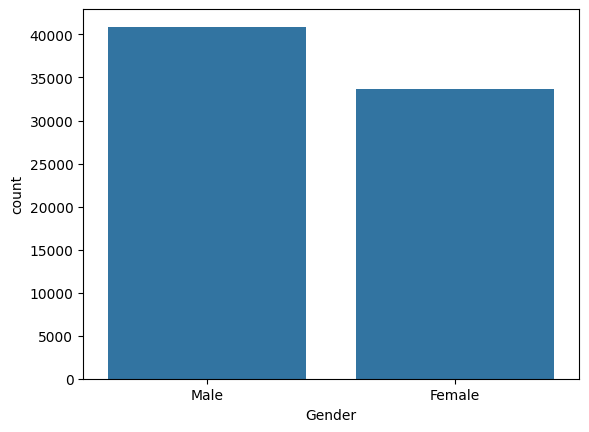

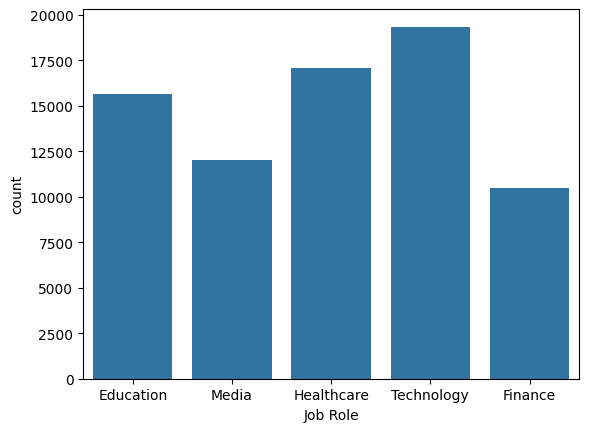

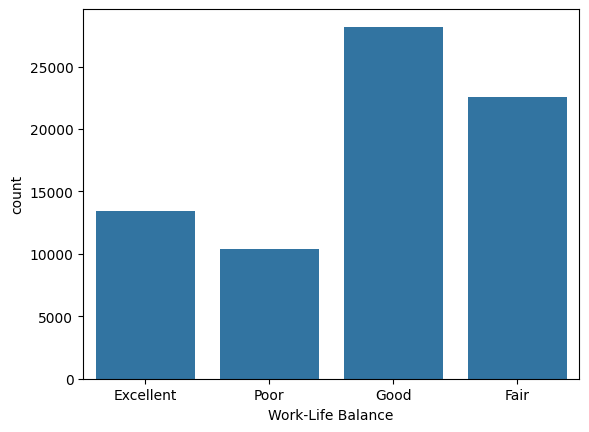

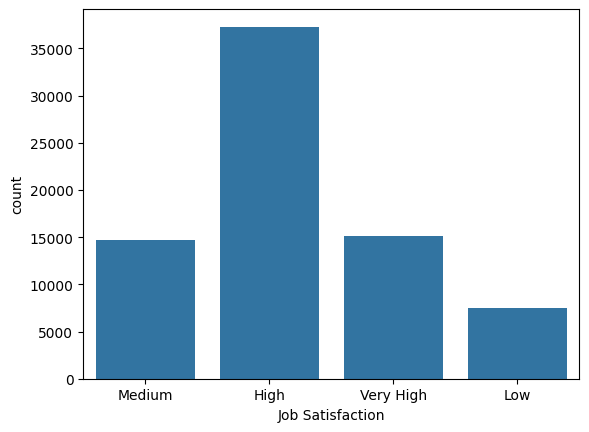

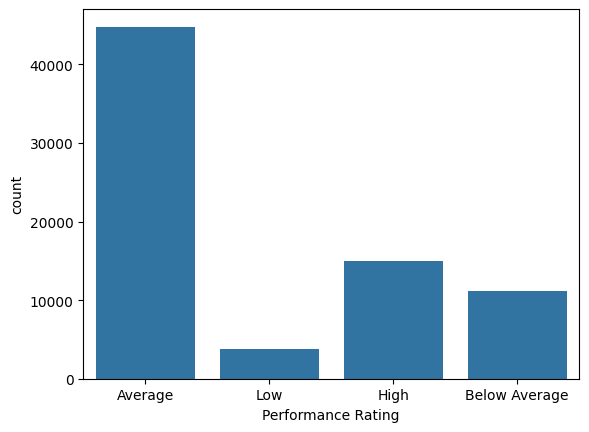

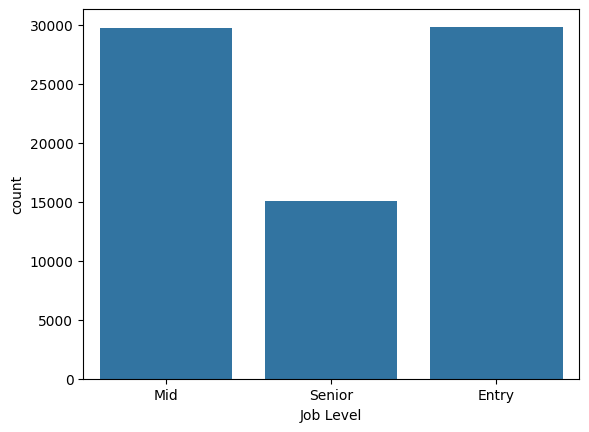

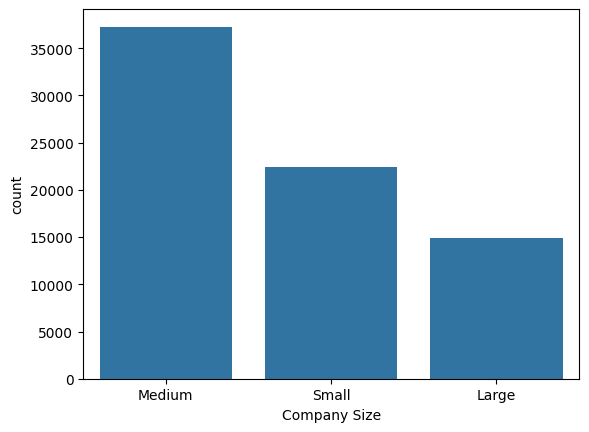

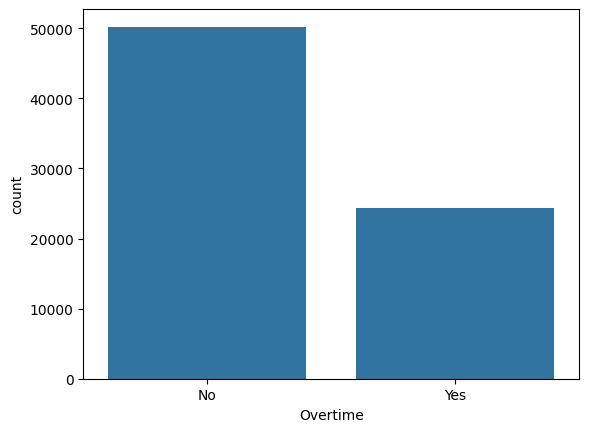

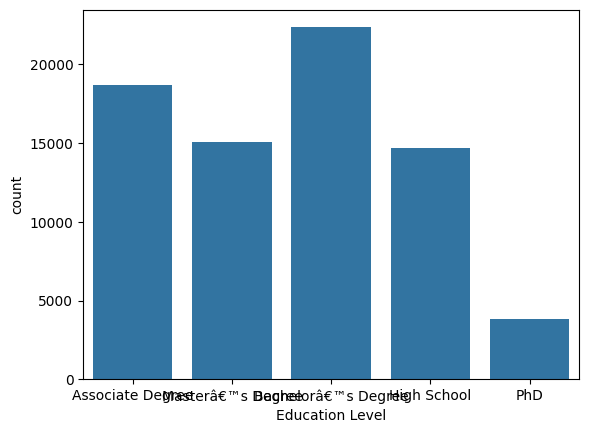

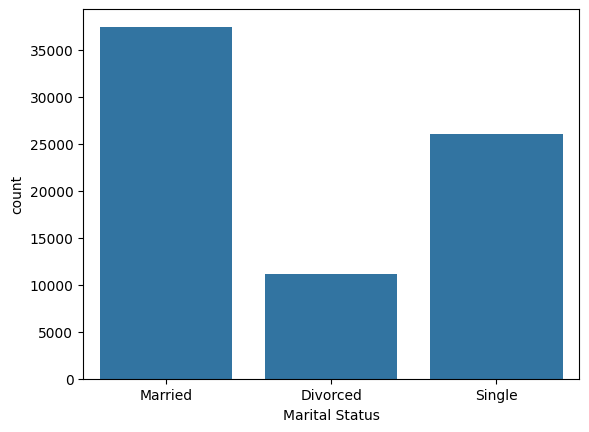

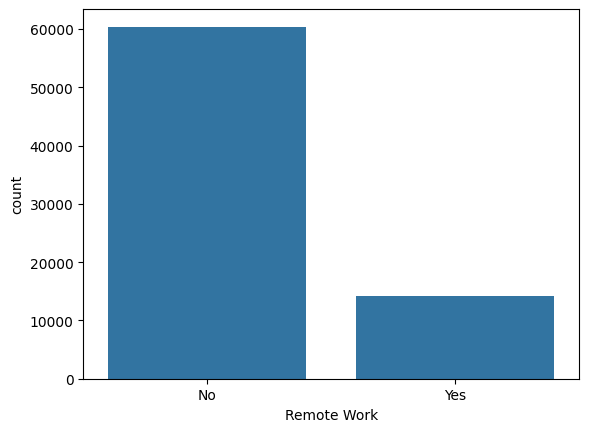

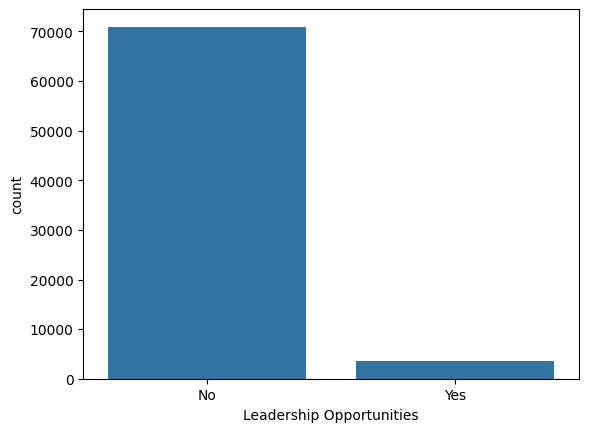

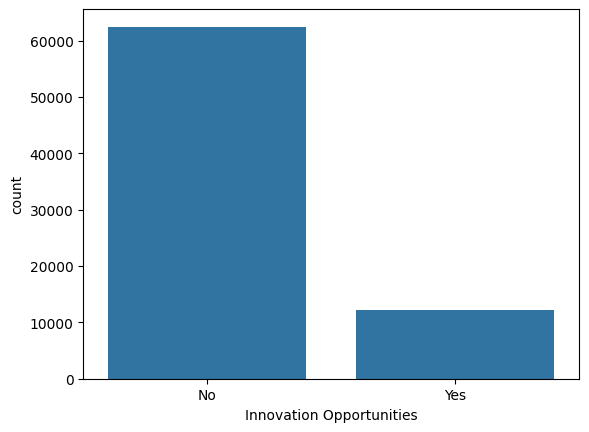

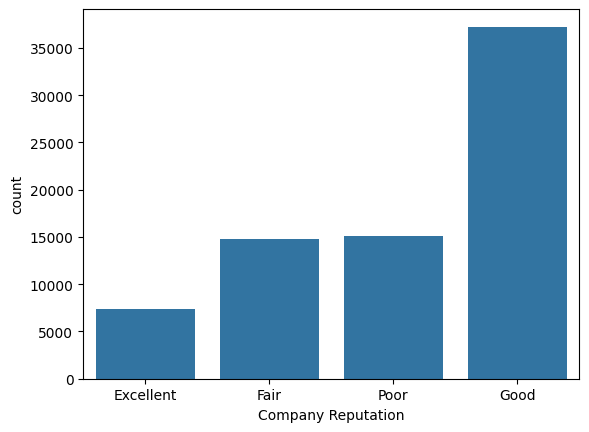

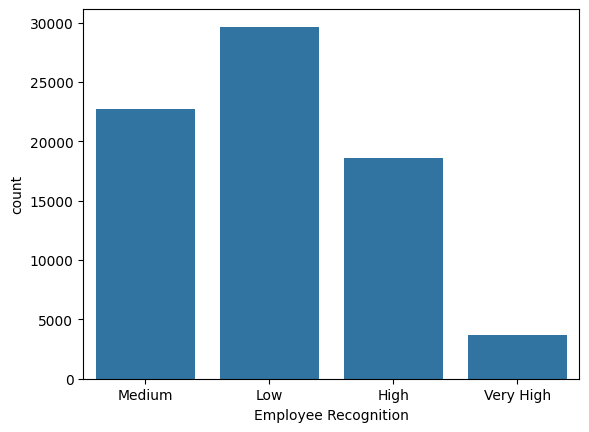

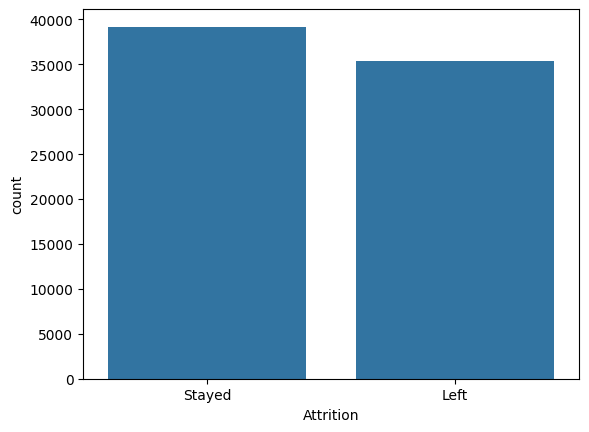

In [280]:
# Write a function to display the categorical columns with their unique values and check for redundant values
cat_col=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Job Level','Company Size','Overtime','Education Level','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition','Attrition']
for i in cat_col:
    sns.countplot(x=i,data=df)
    plt.show()

In [281]:
# Check the data
for i in cat_col:
    print(df[i].value_counts())

Gender
Male      40898
Female    33712
Name: count, dtype: int64
Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64
Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64
Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64
Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64
Job Level
Entry     29820
Mid       29730
Senior    15060
Name: count, dtype: int64
Company Size
Medium    37281
Small     22394
Large     14935
Name: count, dtype: int64
Overtime
No     50230
Yes    24380
Name: count, dtype: int64
Education Level
Bachelorâ€™s Degree    22365
Associate Degree       18678
Masterâ€™s Degree      15044
High School            14701
PhD                     3822
Name: count, dtype: int64
Marit

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [282]:
# Drop redundant columns which are not required for modelling
red_columns=['Work-Life Balance','Job Level','Company Tenure (In Months)']
df.drop(red_columns,axis=1,inplace=True)

In [283]:
# Check first few rows of data
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Education Level,Marital Status,Number of Dependents,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Medium,Average,2,No,...,Associate Degree,Married,0,Medium,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,High,Low,3,No,...,Masterâ€™s Degree,Divorced,3,Medium,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,High,Low,0,No,...,Bachelorâ€™s Degree,Married,3,Medium,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,High,High,1,No,...,High School,Single,2,Small,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Very High,Average,0,Yes,...,High School,Divorced,0,Medium,No,No,No,Fair,Medium,Stayed


In [284]:
df['gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df.drop('Gender',axis=1,inplace=True)
df.head()

,Employee ID,Age,Years at Company,Job Role,Monthly Income,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Marital Status,Number of Dependents,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,gender
0,8410,31,19,Education,5390,Medium,Average,2,No,22.0,...,Married,0,Medium,No,No,No,Excellent,Medium,Stayed,1
1,64756,59,4,Media,5534,High,Low,3,No,21.0,...,Divorced,3,Medium,No,No,No,Fair,Low,Stayed,0
2,30257,24,10,Healthcare,8159,High,Low,0,No,11.0,...,Married,3,Medium,No,No,No,Poor,Low,Stayed,0
3,65791,36,7,Education,3989,High,High,1,No,27.0,...,Single,2,Small,Yes,No,No,Good,Medium,Stayed,0
4,65026,56,41,Education,4821,Very High,Average,0,Yes,71.0,...,Divorced,0,Medium,No,No,No,Fair,Medium,Stayed,1


In [285]:
df['Attrition']=df['Attrition'].replace({'Stayed':1,'Left':0})

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74610 non-null  int64  
 1   Age                       74610 non-null  int64  
 2   Years at Company          74610 non-null  int64  
 3   Job Role                  74610 non-null  object 
 4   Monthly Income            74610 non-null  int64  
 5   Job Satisfaction          74610 non-null  object 
 6   Performance Rating        74610 non-null  object 
 7   Number of Promotions      74610 non-null  int64  
 8   Overtime                  74610 non-null  object 
 9   Distance from Home        74610 non-null  float64
 10  Education Level           74610 non-null  object 
 11  Marital Status            74610 non-null  object 
 12  Number of Dependents      74610 non-null  int64  
 13  Company Size              74610 non-null  object 
 14  Remote

In [287]:
df['Education Level'].head()

0       Associate Degree
1      Masterâ€™s Degree
2    Bachelorâ€™s Degree
3            High School
4            High School
Name: Education Level, dtype: object

In [288]:
df.head()

,Employee ID,Age,Years at Company,Job Role,Monthly Income,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Marital Status,Number of Dependents,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,gender
0,8410,31,19,Education,5390,Medium,Average,2,No,22.0,...,Married,0,Medium,No,No,No,Excellent,Medium,1,1
1,64756,59,4,Media,5534,High,Low,3,No,21.0,...,Divorced,3,Medium,No,No,No,Fair,Low,1,0
2,30257,24,10,Healthcare,8159,High,Low,0,No,11.0,...,Married,3,Medium,No,No,No,Poor,Low,1,0
3,65791,36,7,Education,3989,High,High,1,No,27.0,...,Single,2,Small,Yes,No,No,Good,Medium,1,0
4,65026,56,41,Education,4821,Very High,Average,0,Yes,71.0,...,Divorced,0,Medium,No,No,No,Fair,Medium,1,1


In [289]:
df.columns.to_list()

['Employee ID',
 'Age',
 'Years at Company',
 'Job Role',
 'Monthly Income',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Overtime',
 'Distance from Home',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition',
 'gender']

In [290]:
num=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents']
df[num].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000
mean,38.529379,15.722638,7344.931417,0.832958,49.991074,1.657432
std,12.082299,11.224059,2596.373589,0.995326,28.151335,1.579862
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000
25%,28.000000,7.000000,5652.000000,0.000000,26.000000,0.000000
50%,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000
75%,49.000000,23.000000,8876.000000,2.000000,74.000000,3.000000
90%,55.000000,33.000000,10104.100000,2.000000,89.000000,4.000000
95%,57.000000,38.000000,10824.550000,3.000000,94.000000,5.000000
99%,59.000000,45.000000,12233.000000,4.000000,98.000000,6.000000


In [291]:
out=['Monthly Income','Number of Dependents','Distance from Home']
median = df[out].median()
lower_bound = df[out].quantile(0.01)
upper_bound = df[out].quantile(0.99)
df[out] = np.where((df[out] < lower_bound) | (df[out] > upper_bound), median, df[out])

In [292]:
num=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents']
df[num].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000
mean,38.529379,15.722638,7291.736677,0.832958,50.007492,1.649832
std,12.082299,11.224059,2033.709654,0.995326,27.335304,1.553116
min,18.000000,1.000000,3139.000000,0.000000,2.000000,0.000000
25%,28.000000,7.000000,5713.000000,0.000000,27.000000,0.000000
50%,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000
75%,49.000000,23.000000,8814.000000,2.000000,73.000000,3.000000
90%,55.000000,33.000000,9989.000000,2.000000,88.000000,4.000000
95%,57.000000,38.000000,10651.000000,3.000000,93.000000,5.000000
99%,59.000000,45.000000,11651.000000,4.000000,98.000000,6.000000


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [293]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [294]:
# Put all the feature variables in X
X=df.drop(['Employee ID','Attrition'],axis=1)
# Put the target variable in y
y=df['Attrition']

In [295]:
X.head()

,Age,Years at Company,Job Role,Monthly Income,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,gender
0,31,19,Education,5390.0,Medium,Average,2,No,22.0,Associate Degree,Married,0.0,Medium,No,No,No,Excellent,Medium,1
1,59,4,Media,5534.0,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3.0,Medium,No,No,No,Fair,Low,0
2,24,10,Healthcare,8159.0,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3.0,Medium,No,No,No,Poor,Low,0
3,36,7,Education,3989.0,High,High,1,No,27.0,High School,Single,2.0,Small,Yes,No,No,Good,Medium,0
4,56,41,Education,4821.0,Very High,Average,0,Yes,71.0,High School,Divorced,0.0,Medium,No,No,No,Fair,Medium,1


In [296]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [297]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [298]:
y_test.shape

(22383,)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [299]:
# Select numerical columns
train_numerical = X_train.select_dtypes(include=['int64', 'float64'])
train_numerical.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,gender
60704,33,23,6379.0,0,40.0,2.0,0
16163,52,3,3776.0,1,93.0,2.0,1
25709,36,20,12194.0,0,21.0,2.0,0
4354,46,7,7591.0,0,96.0,1.0,0
49862,35,26,5028.0,1,28.0,0.0,1


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

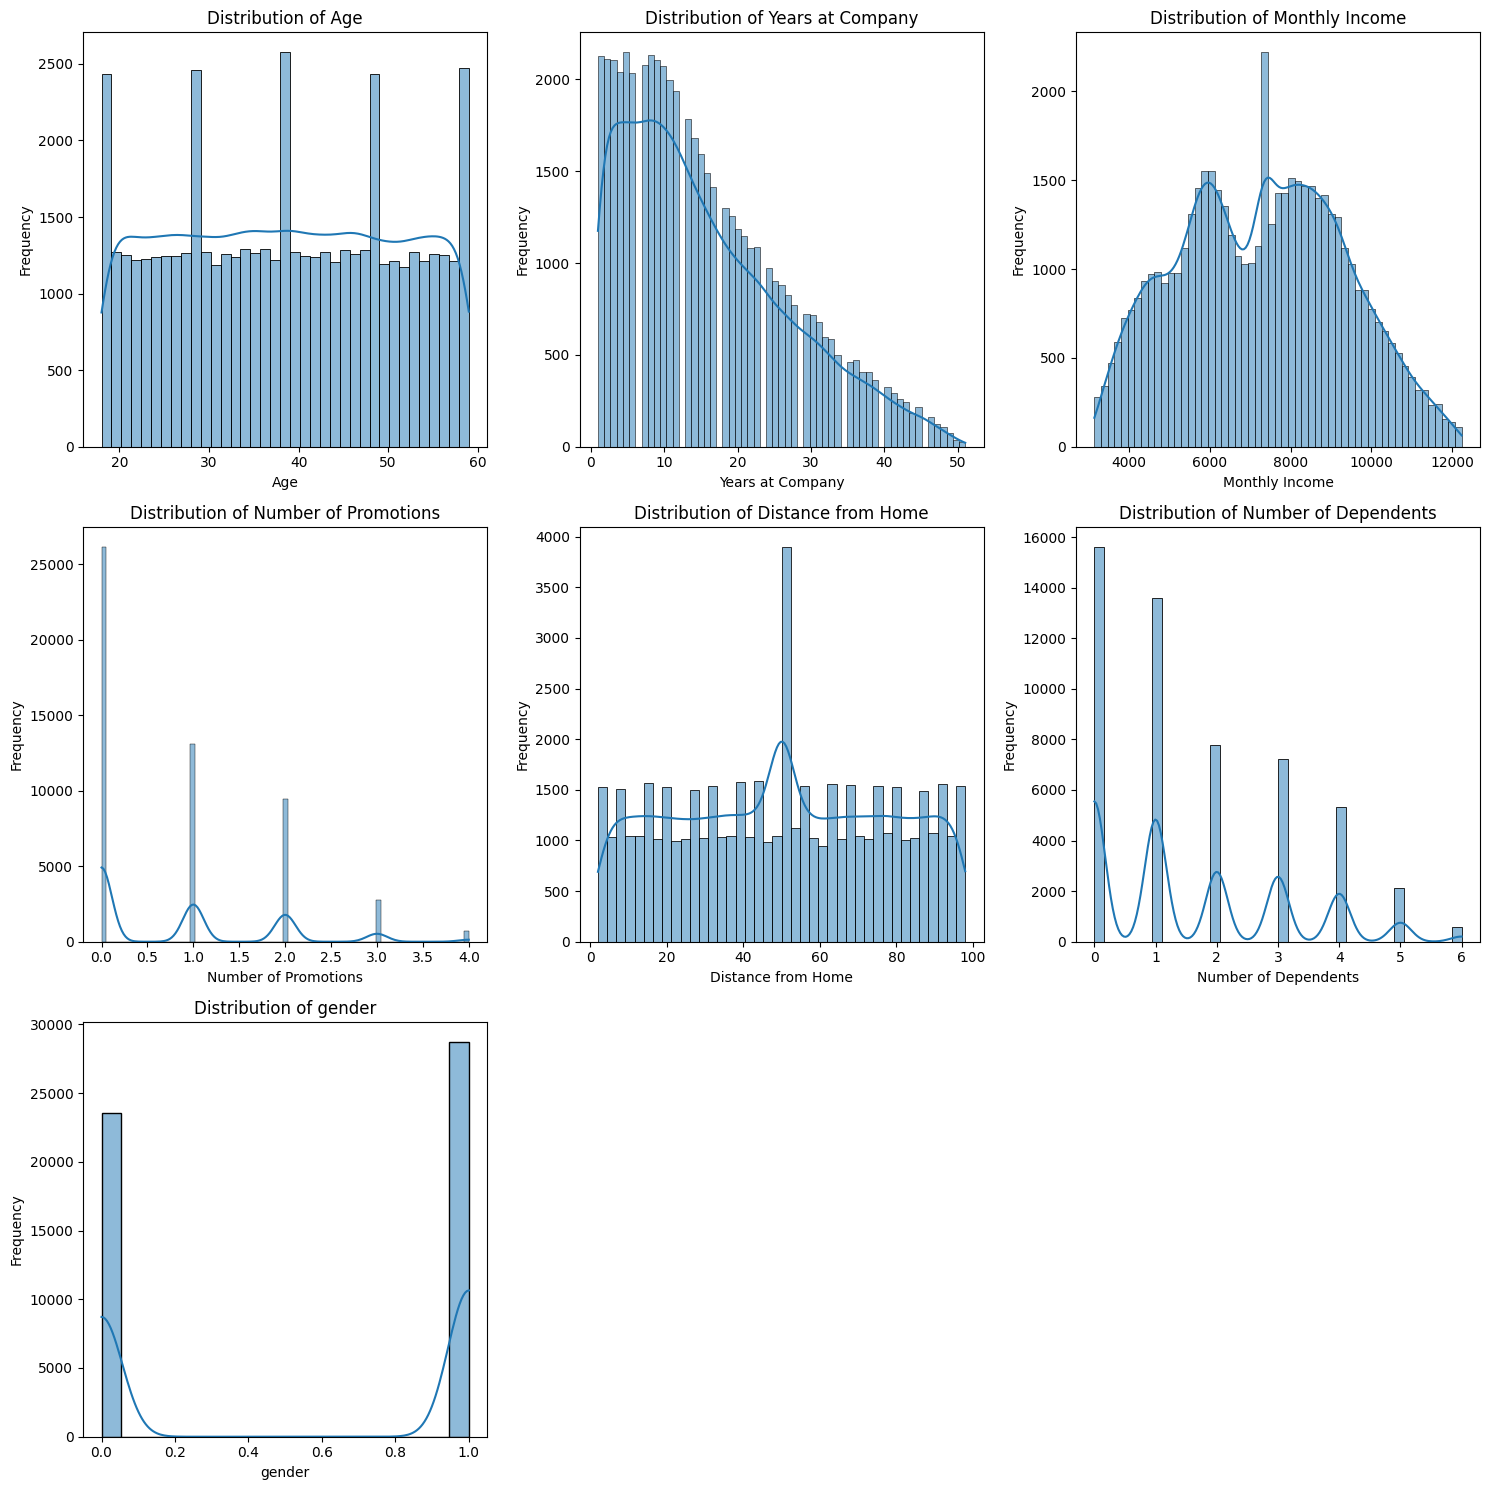

In [300]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of numerical columns
numerical_cols = train_numerical.columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

# Plot the distribution of numerical columns
for i, col in enumerate(numerical_cols):
    sns.histplot(train_numerical[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Show the combined plot
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

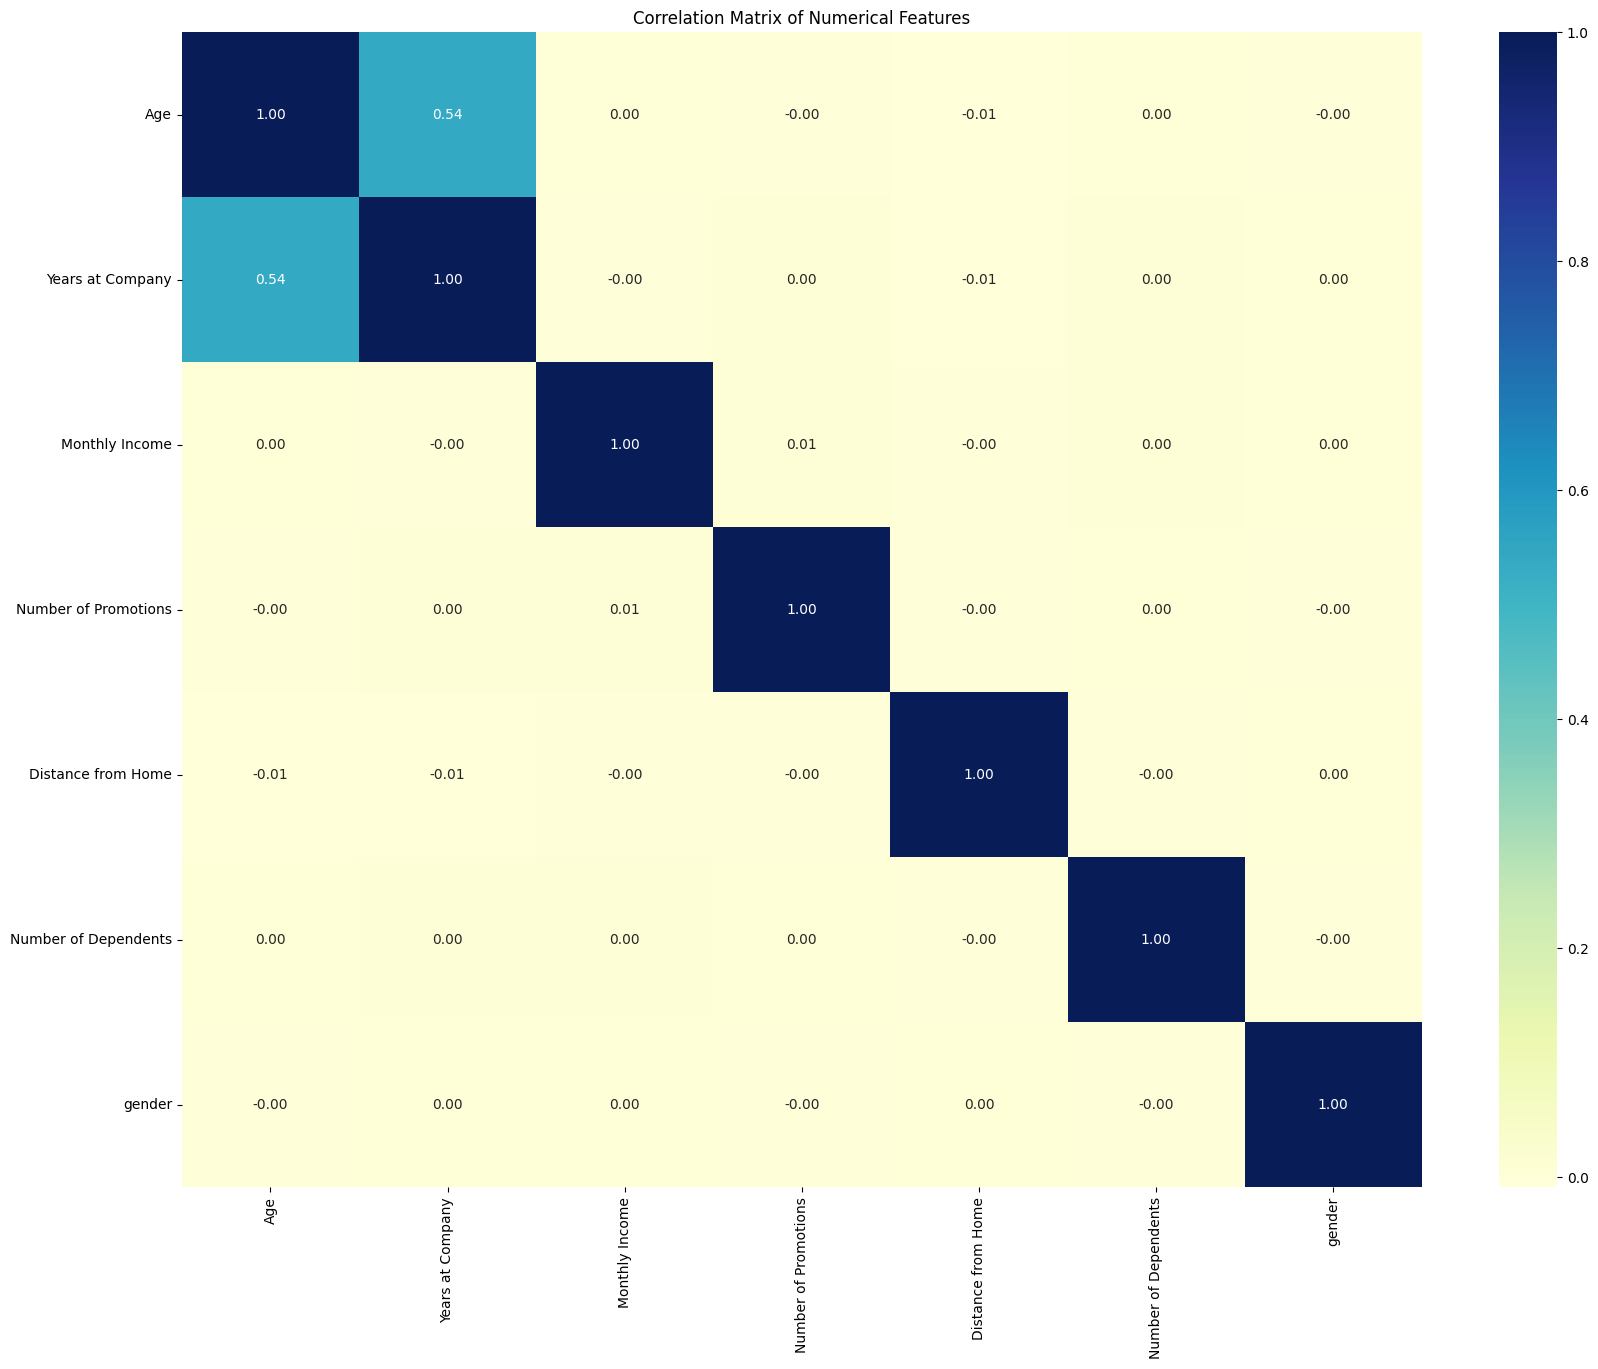

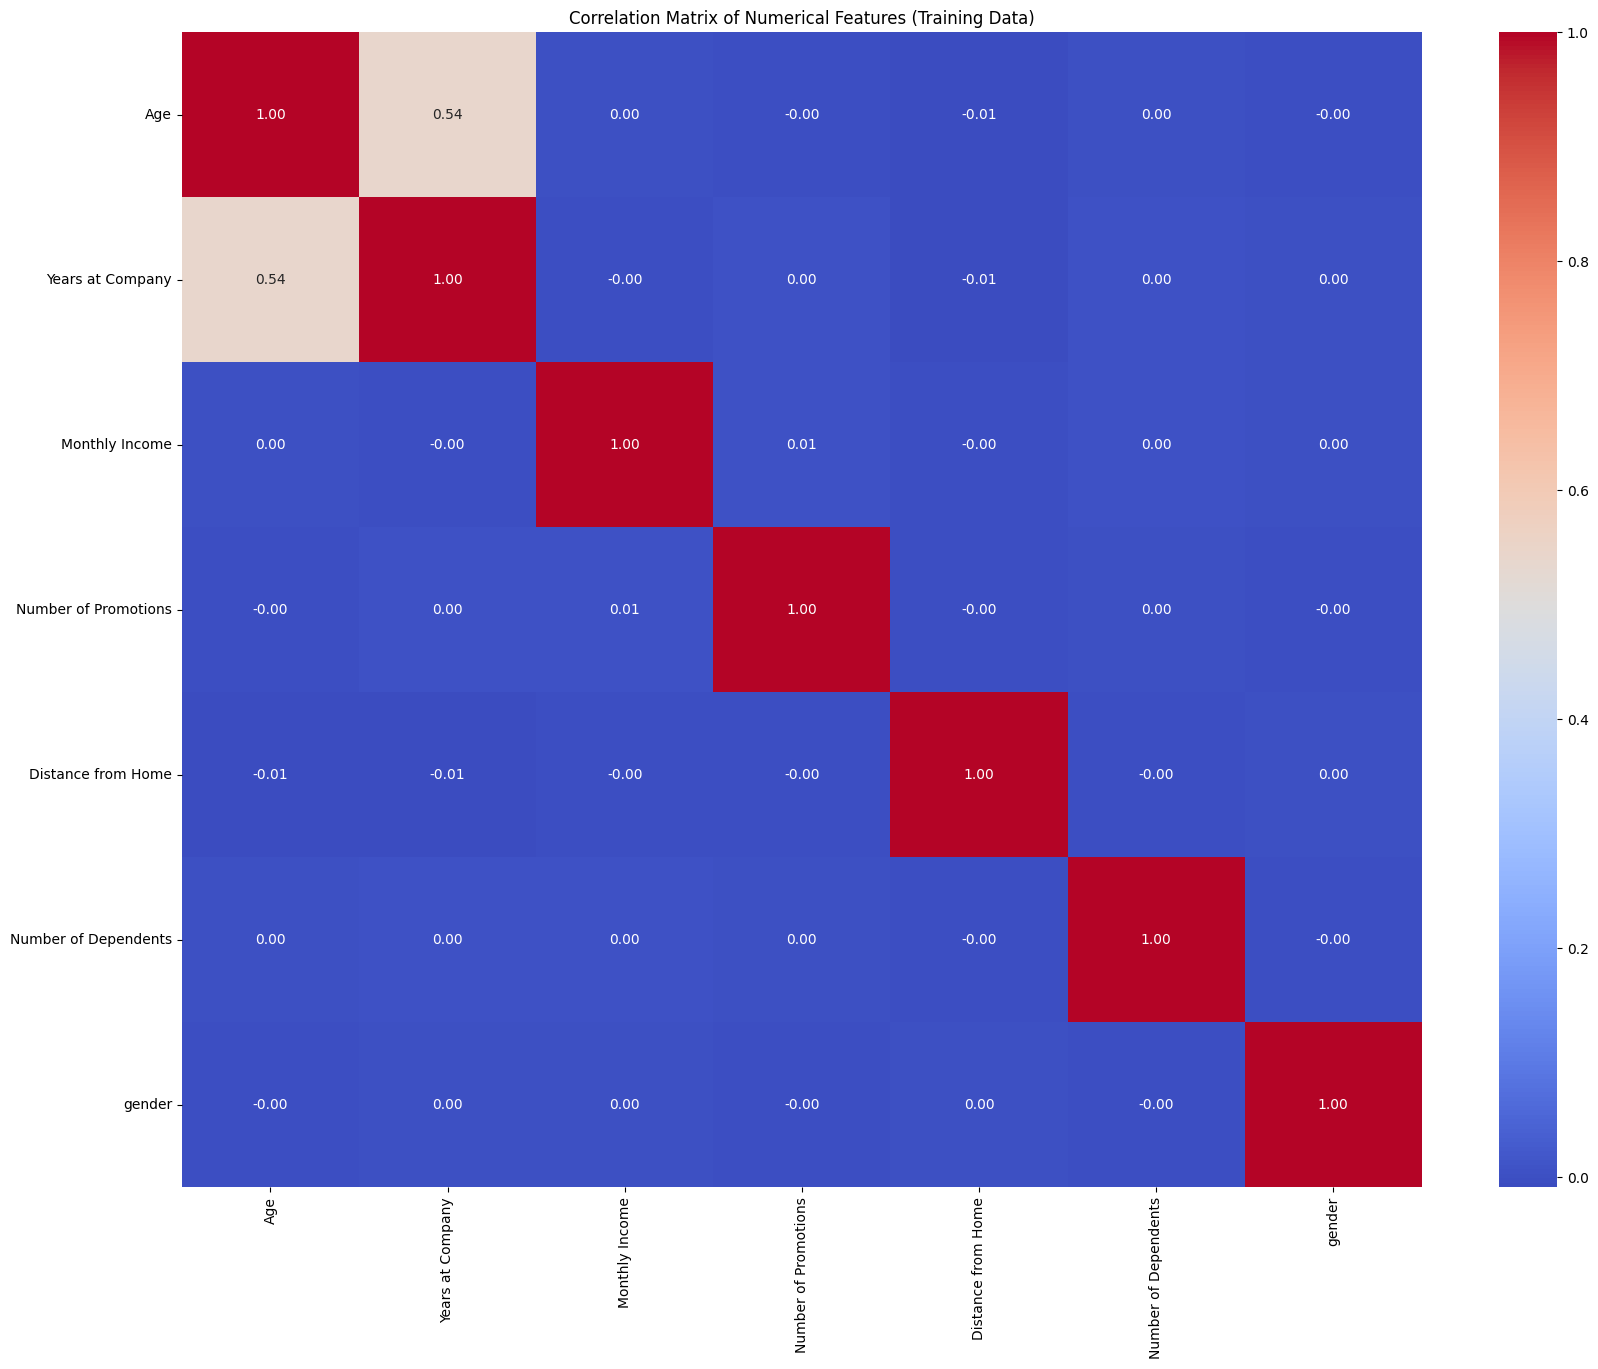

In [301]:
# Create correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(train_numerical.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(train_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Training Data)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

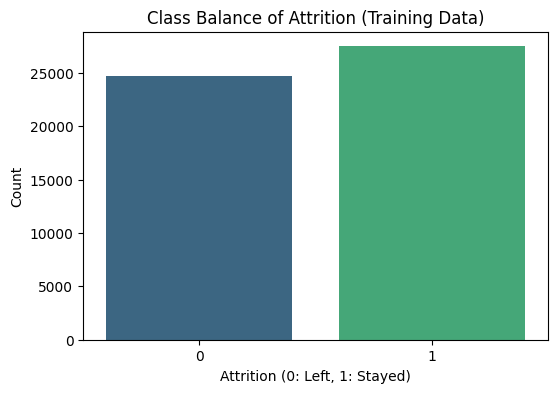

In [302]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, data=X_train,palette='viridis') # Use y_train for the target variable
plt.title('Class Balance of Attrition (Training Data)')
plt.xlabel('Attrition (0: Left, 1: Stayed)')
plt.ylabel('Count')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

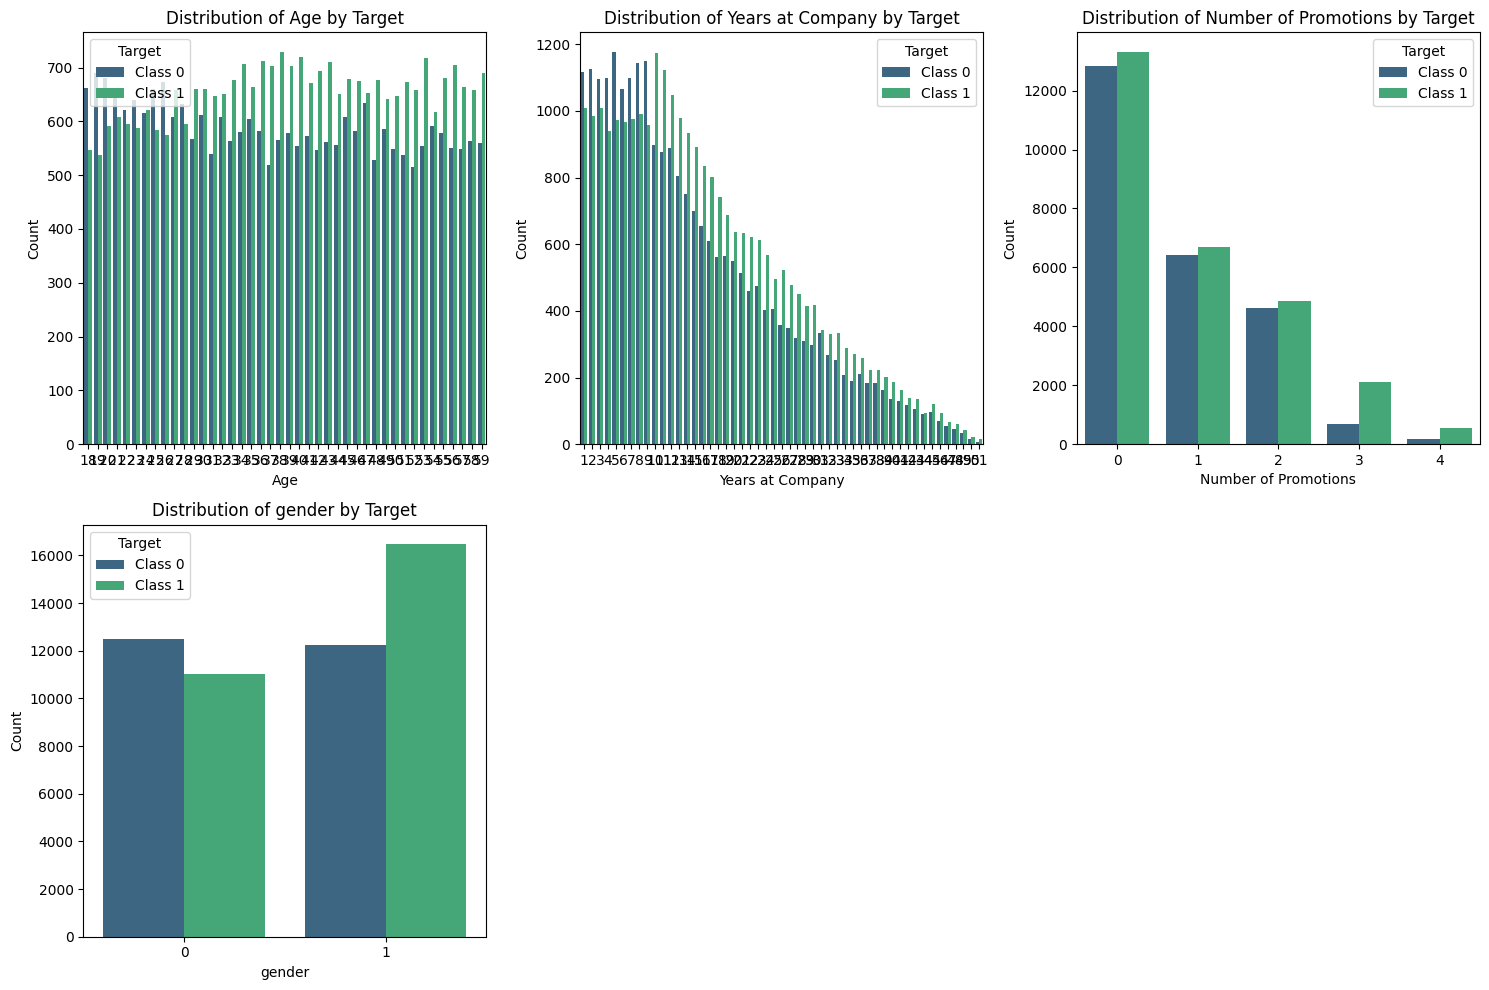

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine X_train and y_train into one DataFrame for plotting
train_df = X_train.copy()
train_df['target'] = y_train.values  # assuming y_train is a Series or ndarray

# Select categorical columns from X_train (encoded categorical columns like uint8 or int64)
train_categorical = train_df.select_dtypes(include=['uint8', 'int64'])

# Remove target from categorical columns if included
categorical_cols = [col for col in train_categorical.columns if col != 'target']

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='target', data=train_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', labels=['Class 0', 'Class 1'])

# Remove extra subplots if any
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [304]:
# Select numerical columns
validation_numerical = X_test.select_dtypes(include=['int64', 'float64'])
validation_numerical.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,gender
61539,58,43,10970.0,0,53.0,0.0,1
42583,18,6,9242.0,0,31.0,3.0,0
55936,49,15,5171.0,0,55.0,3.0,1
66035,46,18,8151.0,2,42.0,0.0,0
23119,43,22,8304.0,1,50.0,2.0,1


5.1.2 Plot distribution of numerical columns

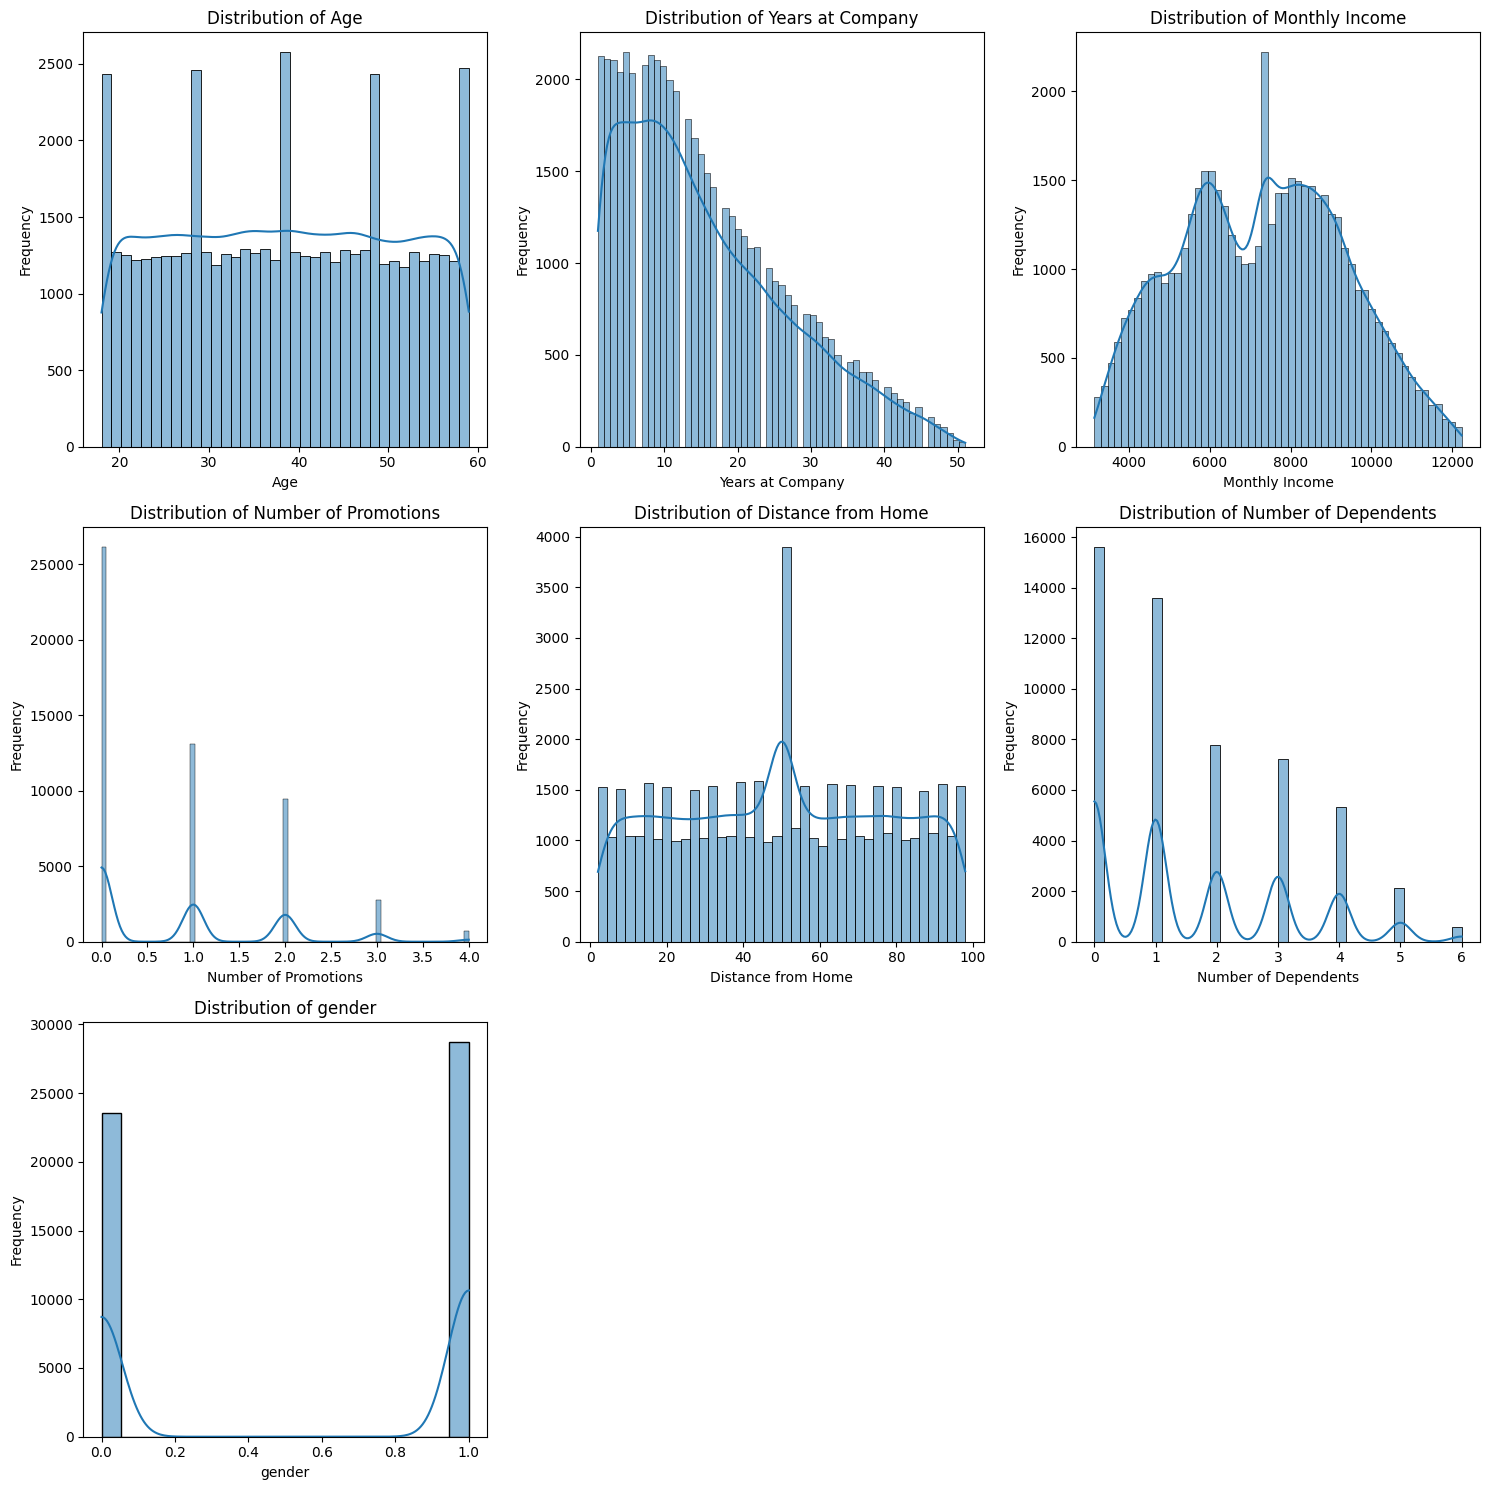

In [305]:
# Plot all the numerical columns to understand their distribution
numerical_cols = train_numerical.columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(train_numerical[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

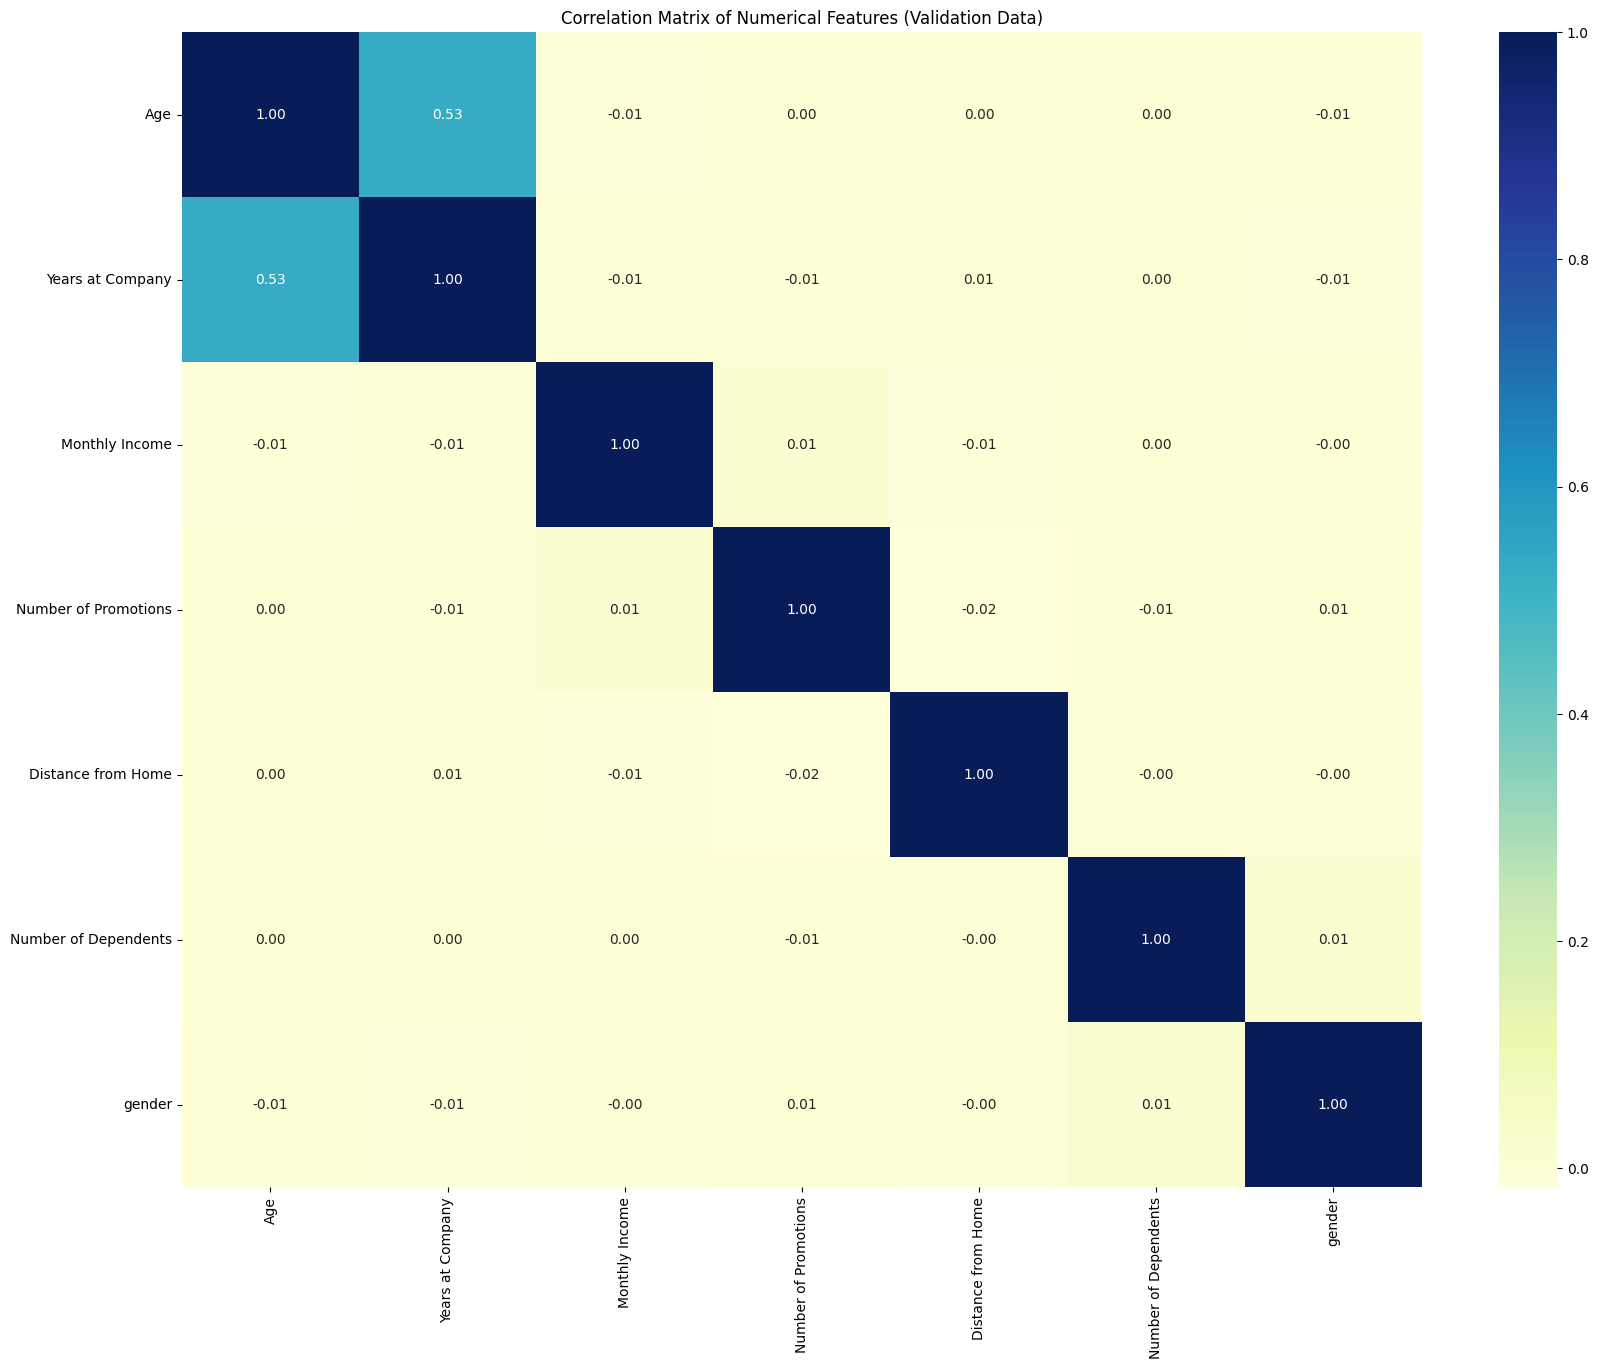

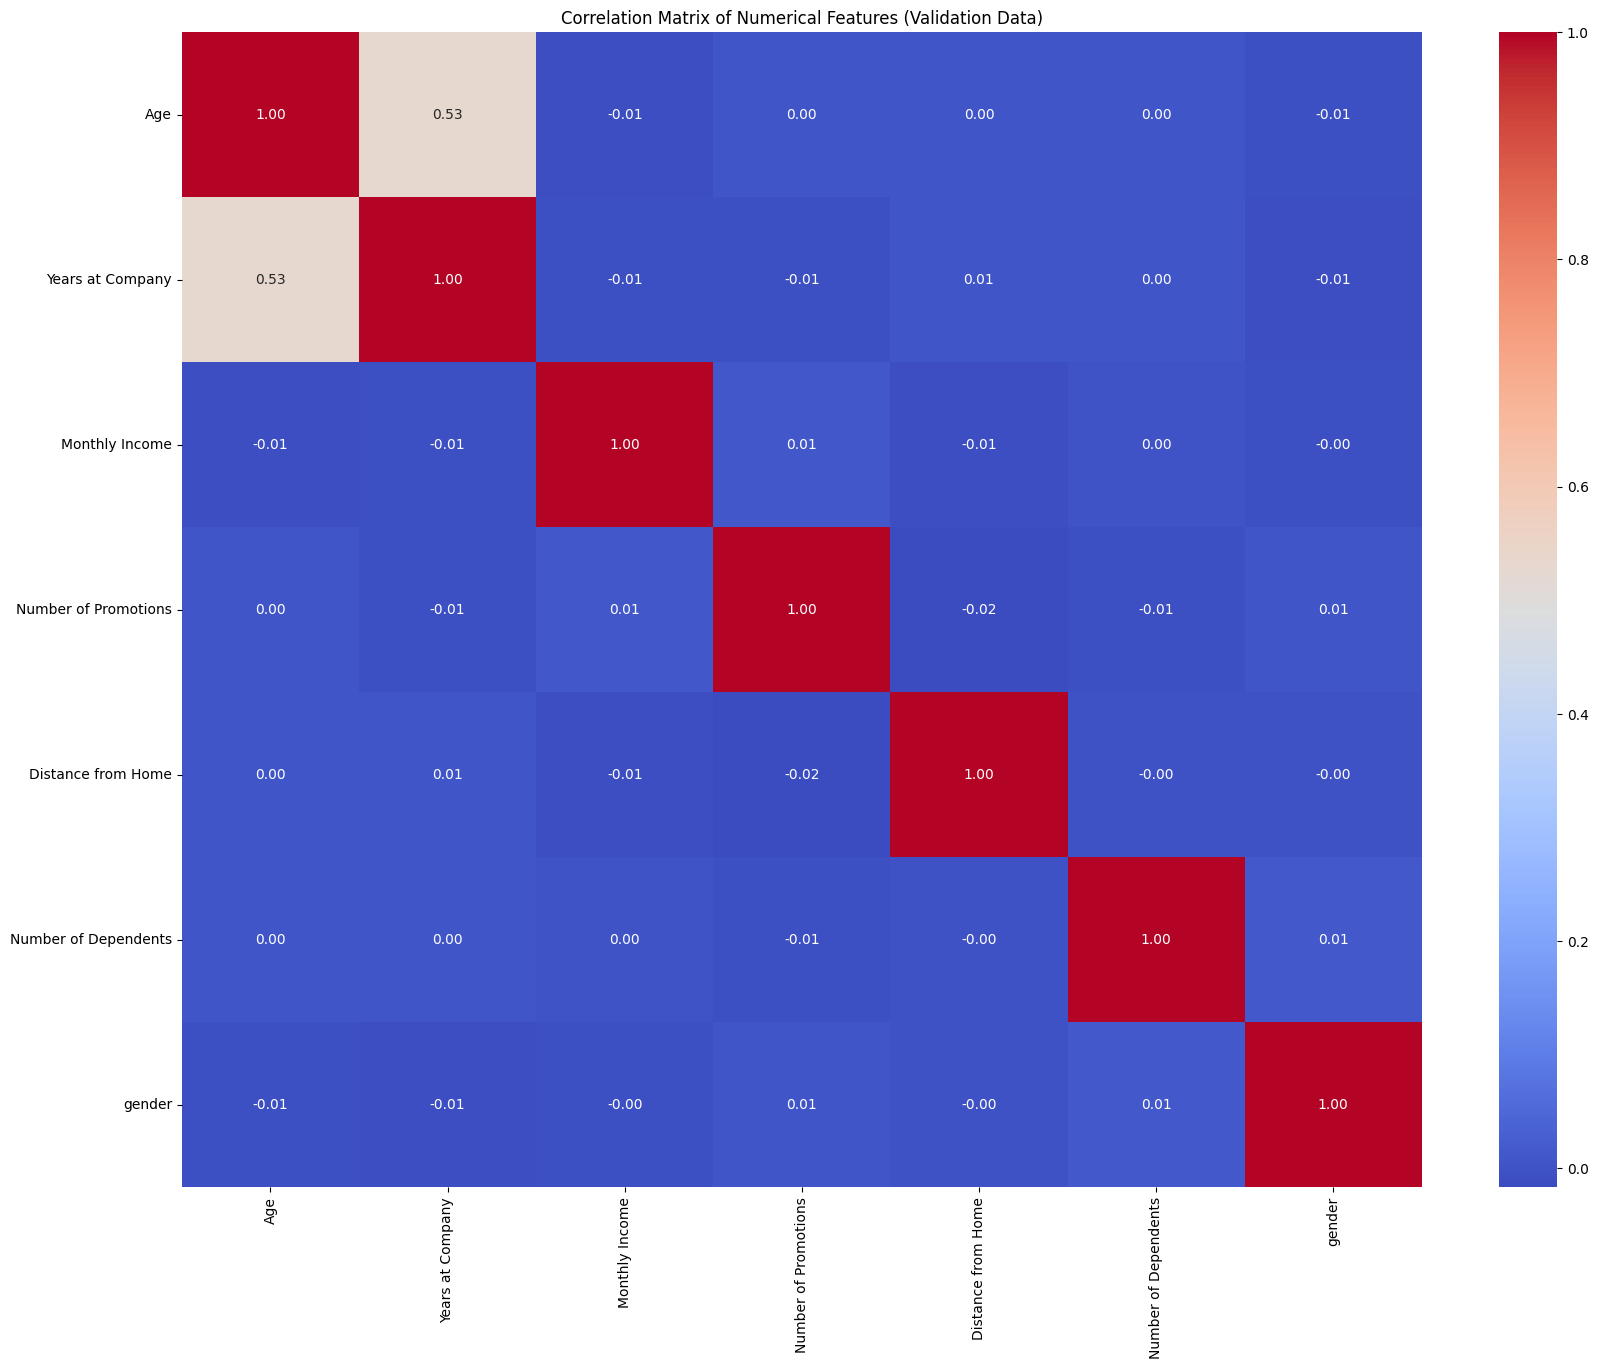

In [306]:
# Create correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(validation_numerical.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Validation Data)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(validation_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Validation Data)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

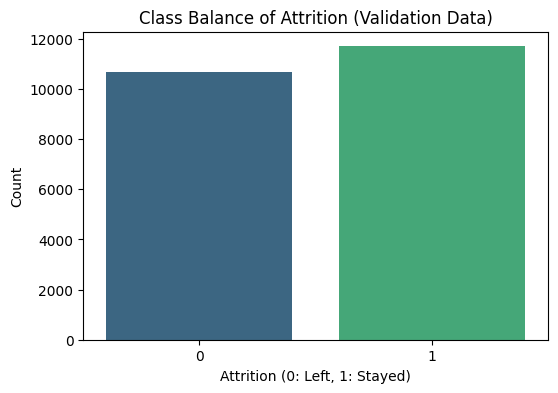

In [171]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, data=X_test,palette='viridis')
plt.title('Class Balance of Attrition (Validation Data)')
plt.xlabel('Attrition (0: Left, 1: Stayed)')
plt.ylabel('Count')
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

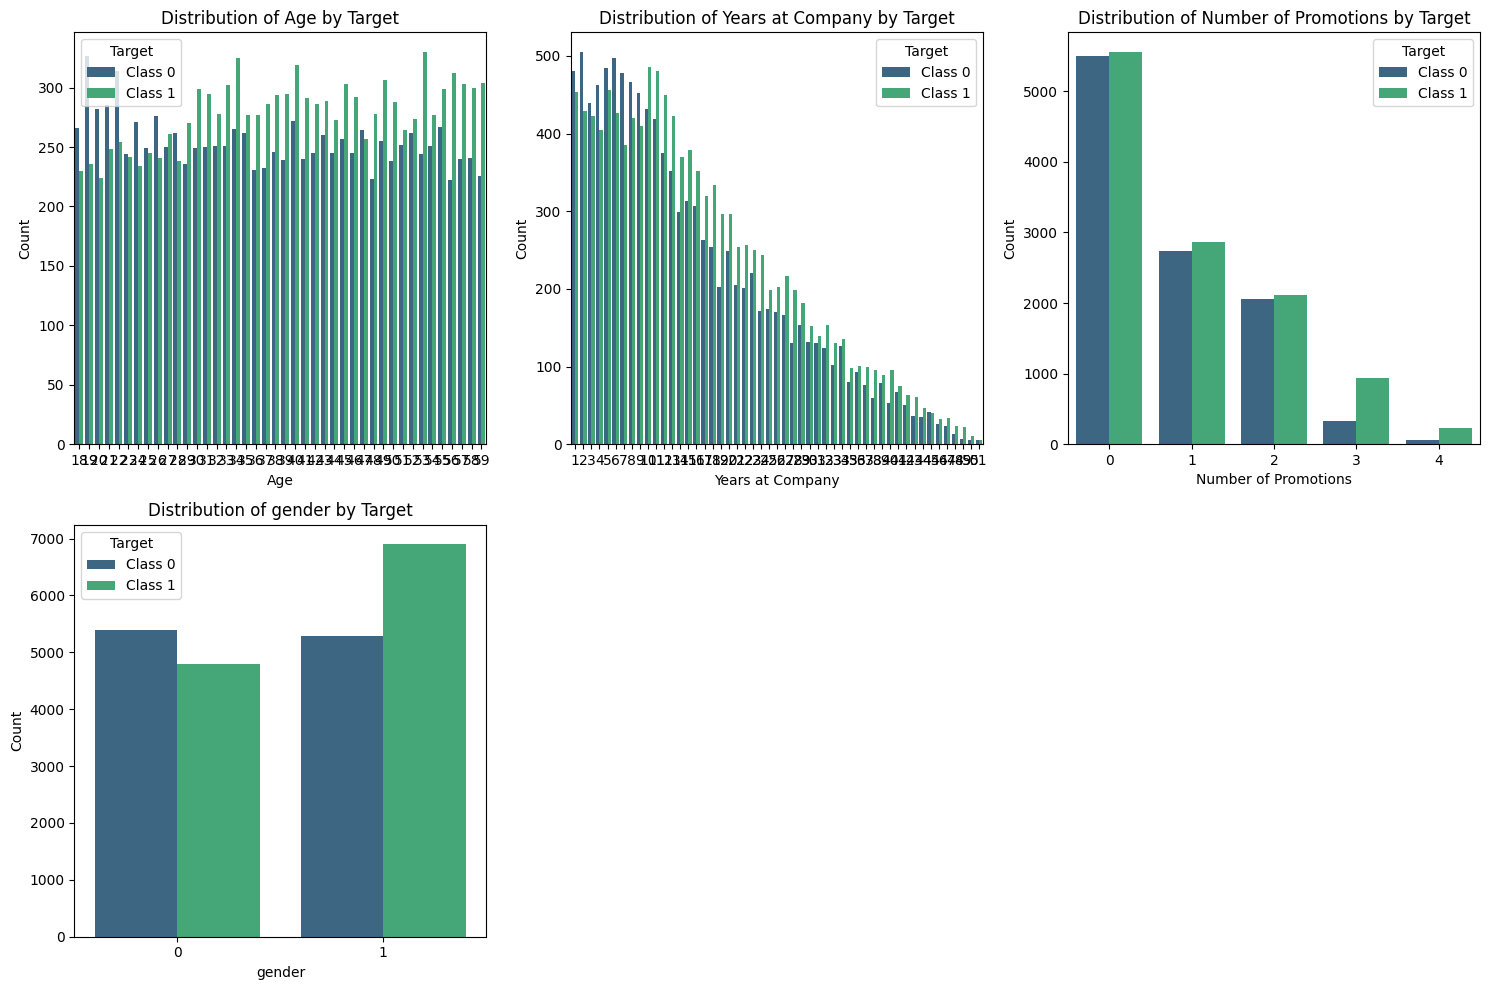

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine X_test and y_test into one DataFrame for plotting
validation_df = X_test.copy()
validation_df['target'] = y_test.values  # make sure y_test is Series or ndarray

# Select categorical columns from validation data
validation_categorical = validation_df.select_dtypes(include=['uint8', 'int64'])

# Remove target from categorical columns if present
categorical_cols = [col for col in validation_categorical.columns if col != 'target']

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='target', data=validation_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', labels=['Class 0', 'Class 1'])  # adjust labels as needed

# Remove any empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74610 non-null  int64  
 1   Age                       74610 non-null  int64  
 2   Years at Company          74610 non-null  int64  
 3   Job Role                  74610 non-null  object 
 4   Monthly Income            74610 non-null  float64
 5   Job Satisfaction          74610 non-null  object 
 6   Performance Rating        74610 non-null  object 
 7   Number of Promotions      74610 non-null  int64  
 8   Overtime                  74610 non-null  object 
 9   Distance from Home        74610 non-null  float64
 10  Education Level           74610 non-null  object 
 11  Marital Status            74610 non-null  object 
 12  Number of Dependents      74610 non-null  float64
 13  Company Size              74610 non-null  object 
 14  Remote

In [173]:
#List the categorical columns that need dummy variables

categorical_for_dummies = X_train.select_dtypes(include='object').columns
print("Categorical columns requiring dummy variables:", list(categorical_for_dummies))

Categorical columns requiring dummy variables: ['Job Role', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


In [174]:
X_train.head()

,Age,Years at Company,Job Role,Monthly Income,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,gender
60704,33,23,Media,6379.0,High,Below Average,0,No,40.0,Bachelorâ€™s Degree,Single,2.0,Medium,No,No,No,Fair,High,0
16163,52,3,Education,3776.0,Medium,Average,1,Yes,93.0,Bachelorâ€™s Degree,Single,2.0,Small,No,No,No,Poor,Low,1
25709,36,20,Technology,12194.0,High,High,0,Yes,21.0,High School,Married,2.0,Medium,No,No,Yes,Good,Medium,0
4354,46,7,Healthcare,7591.0,Very High,Average,0,No,96.0,Masterâ€™s Degree,Divorced,1.0,Medium,No,No,No,Good,High,0
49862,35,26,Education,5028.0,Medium,High,1,Yes,28.0,Masterâ€™s Degree,Divorced,0.0,Small,No,No,Yes,Good,Low,1


In [175]:
categorical_for_dummies

Index(['Job Role', 'Job Satisfaction', 'Performance Rating', 'Overtime',
       'Education Level', 'Marital Status', 'Company Size', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [176]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[categorical_for_dummies], drop_first=True)

# Convert True/False to 1/0 integers
X_train_dummies = X_train_dummies.astype(int)

X_train_dummies

,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
60704,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
16163,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
25709,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4354,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49862,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
63370,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
65615,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
56088,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [177]:

# Drop original categorical columns
X_train = X_train.drop(columns=categorical_for_dummies)

# Concatenate dummies back
X_train = pd.concat([X_train, X_train_dummies], axis=1)

In [178]:
X_train_dummies

,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
60704,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
16163,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
25709,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4354,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49862,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
63370,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
65615,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
56088,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Now, drop the original categorical columns and check the DataFrame

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [179]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies = pd.get_dummies(X_test[categorical_for_dummies], drop_first=True)

# Convert True/False to 1/0 integers
X_test_dummies = X_test_dummies.astype(int)

# Add the results to the master DataFrame
X_test = pd.concat([X_test, X_test_dummies], axis=1)

X_test_dummies

,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
61539,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
42583,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
55936,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
66035,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
23119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60911,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
38306,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
57813,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4886,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


Now, drop the original categorical columns and check the DataFrame




In [180]:
# prompt: Now, drop the original categorical columns and check the DataFrame in test

X_test = X_test.drop(categorical_for_dummies, axis=1)
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,gender,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
61539,58,43,10970.0,0,53.0,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
42583,18,6,9242.0,0,31.0,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
55936,49,15,5171.0,0,55.0,3.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
66035,46,18,8151.0,2,42.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
23119,43,22,8304.0,1,50.0,2.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [181]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train.head()
y_test.head()

,Attrition
61539,1
42583,1
55936,0
66035,0
23119,0


In [186]:
y_train

,Attrition_1
60704,False
16163,False
25709,True
4354,False
49862,False
...,...
14260,True
63370,True
65615,True
56088,True


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [187]:
# Create dummy variables using the 'get_dummies' for dependent column in training set
y_train_dummies = pd.get_dummies(y_train['Attrition_1'], prefix='Attrition', drop_first=True)

y_train = pd.concat([y_train, y_train_dummies], axis=1)

# Drop the original 'Attrition' column
y_train.drop(columns=['Attrition_1'], inplace=True)

y_train.head()

,Attrition_True
60704,False
16163,False
25709,True
4354,False
49862,False


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [190]:
y_test

,Attrition
61539,1
42583,1
55936,0
66035,0
23119,0
...,...
60911,1
38306,1
57813,0
4886,0


In [193]:
# Create dummy variables using the 'get_dummies' for dependent column in validation set
y_test_dummies = pd.get_dummies(y_test['Attrition_1'], prefix='Attrition', drop_first=True)

y_test = pd.concat([y_test, y_test_dummies], axis=1)

# Drop the original 'Attrition' column
y_test.drop(columns=['Attrition_1'], inplace=True)

y_test.head()

,Attrition_True
61539,True
42583,True
55936,False
66035,False
23119,False


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [194]:
# Drop redundant columns from both train and validation
cols_to_drop_from_train = [col for col in X_train.columns if col in red_columns or any(col.startswith(f'{rc}_') for rc in red_columns if rc in categorical_for_dummies)]
cols_to_drop_from_test = [col for col in X_test.columns if col in red_columns or any(col.startswith(f'{rc}_') for rc in red_columns if rc in categorical_for_dummies)]

# Check the columns after potential dropping
print("\nX_train columns after dropping redundant:")
print(X_train.columns.tolist())
print("\nX_test columns after dropping redundant:")
print(X_test.columns.tolist())


X_train columns after dropping redundant:
['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'gender', 'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology', 'Job Satisfaction_Low', 'Job Satisfaction_Medium', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_High', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_Bachelorâ€™s Degree', 'Education Level_High School', 'Education Level_Masterâ€™s Degree', 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Company Size_Medium', 'Company Size_Small', 'Remote Work_Yes', 'Leadership Opportunities_Yes', 'Innovation Opportunities_Yes', 'Company Reputation_Fair', 'Company Reputation_Good', 'Company Reputation_Poor', 'Employee Recognition_Low', 'Employee Recognition_Medium', 'Employee Recognition_Very High']

X_test columns after dropping redundant:
['Age', 'Years at Company', 'Monthly

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [195]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [196]:
# Scale the numeric features present in the training set
numerical_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

# Apply scaling to the training data
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])
X_train.head()


# Scale the numerical features present in the validation set
numerical_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
X_test[numerical_cols_test] = scaler.fit_transform(X_test[numerical_cols_test])
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,gender,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
60704,0.365854,0.44,0.356279,0.00,0.395833,0.333333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16163,0.829268,0.04,0.070046,0.25,0.947917,0.333333,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25709,0.439024,0.38,0.995711,0.00,0.197917,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4354,0.682927,0.12,0.489554,0.00,0.979167,0.166667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49862,0.414634,0.50,0.207719,0.25,0.270833,0.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [197]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)

In [198]:
X_train

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,gender,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
60704,0.365854,0.44,0.356279,0.00,0.395833,0.333333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16163,0.829268,0.04,0.070046,0.25,0.947917,0.333333,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25709,0.439024,0.38,0.995711,0.00,0.197917,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4354,0.682927,0.12,0.489554,0.00,0.979167,0.166667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49862,0.414634,0.50,0.207719,0.25,0.270833,0.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,0.585366,0.66,0.700902,0.00,0.500000,0.666667,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63370,0.097561,0.04,0.227403,0.25,0.875000,0.666667,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
65615,0.975610,0.58,0.539037,0.25,0.343750,0.333333,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56088,0.731707,0.04,0.569386,0.00,0.781250,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [199]:
# Assuming your original y_train was a Series with 0 and 1 labels

# If y_train is currently a DataFrame with dummy variables, convert to Series:
if isinstance(y_train, pd.DataFrame) and y_train.shape[1] == 2:
    y_train = y_train.iloc[:, 1]  # select the positive class column

# Now try RFE again
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [200]:
# Display the features selected by RFE
X_train.columns[rfe.support_]


Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'gender', 'Job Satisfaction_Low',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD',
       'Marital Status_Single', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [201]:
# Put columns selected by RFE into variable 'col'
col = list(X_train.columns[rfe.support_])
print("Selected Features:\n", col)

Selected Features:
 ['Years at Company', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'gender', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [202]:
# Select only the columns selected by RFE
selected_features = list(X_train.columns[rfe.support_])

In [203]:
# View the training data
X_train[selected_features].head()

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,gender,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
60704,0.44,0.00,0.395833,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16163,0.04,0.25,0.947917,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
25709,0.38,0.00,0.197917,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4354,0.12,0.00,0.979167,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49862,0.50,0.25,0.270833,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [204]:
# Import statsmodels and add constant to training set

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[selected_features].astype(float))

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [205]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = sm.Logit(y_train, X_train_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579848
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Attrition_True   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.1618
Time:                        13:33:02   Log-Likelihood:                -30284.
converged:                       True   LL-Null:                       -36128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3012      0.033      9.12

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [206]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [208]:
# Predict the probabilities on the training set
train_probs = result.predict(X_train_sm)
print(train_probs)

60704    0.175496
16163    0.141258
25709    0.584832
4354     0.347262
49862    0.699273
           ...   
14260    0.806748
63370    0.572447
65615    0.808225
56088    0.689619
38408    0.935288
Length: 52227, dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [209]:
# Reshape it into an array
train_probs_array = np.array(train_probs).reshape(-1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [210]:
print(y_train.shape)
print(train_probs_array.shape)

(52227, 1)
(52227,)


In [211]:
actual_stayed = y_train.values.flatten() if hasattr(y_train, 'values') else y_train.flatten()

In [212]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
pred_df = pd.DataFrame({
    'actual_stayed': actual_stayed,
    'predicted_prob': train_probs_array
})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [213]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
pred_df['Predicted'] = (pred_df['predicted_prob'] > 0.5).astype(int)

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [214]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(pred_df['actual_stayed'], pred_df['Predicted'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6880


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [215]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(pred_df['actual_stayed'], pred_df['Predicted'])
print(conf_matrix)

[[15717  9015]
 [ 7278 20217]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [216]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = conf_matrix.ravel()

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [217]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

Sensitivity: 0.7353


In [218]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.6355


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [219]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")

Precision: 0.6916


In [220]:
# Calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")

Recall: 0.7353


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [221]:
# Define ROC function
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(actual, predicted_probs):
    fpr, tpr, thresholds = roc_curve(actual, predicted_probs)
    auc_score = roc_auc_score(actual, predicted_probs)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    return fpr, tpr, thresholds, auc_score

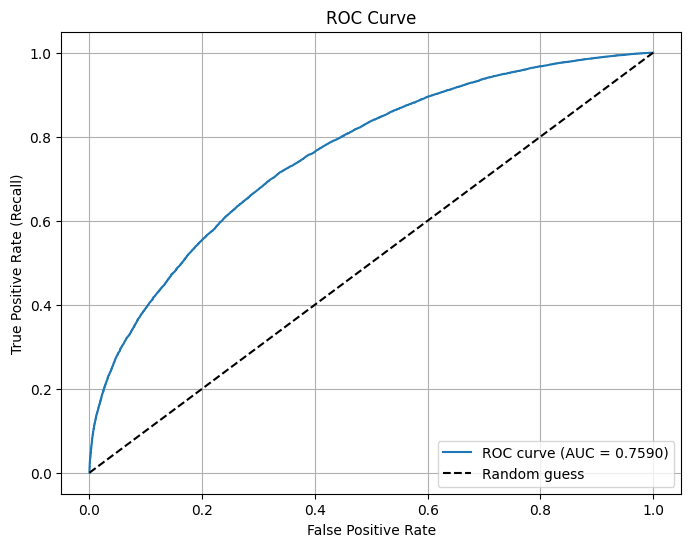

In [222]:
# Call the ROC function
fpr, tpr, thresholds, auc_score = plot_roc(pred_df['actual_stayed'], pred_df['predicted_prob'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [223]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoffs = [0.3, 0.4, 0.5, 0.6, 0.7]

for cutoff in cutoffs:
    pred_df[f'Pred_{cutoff}'] = (pred_df['predicted_prob'] > cutoff).astype(int)

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [224]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
metrics_list = []

for cutoff in cutoffs:
    pred_col = f'Pred_{cutoff}'
    tn, fp, fn, tp = metrics.confusion_matrix(pred_df['actual_stayed'], pred_df[pred_col]).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    metrics_list.append({
        'Cutoff': cutoff,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    })

metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)


   Cutoff  Accuracy  Sensitivity  Specificity
0     0.3  0.645318     0.922350     0.337336
1     0.4  0.675455     0.845208     0.486738
2     0.5  0.688035     0.735297     0.635492
3     0.6  0.673272     0.572540     0.785258
4     0.7  0.631570     0.388107     0.902232


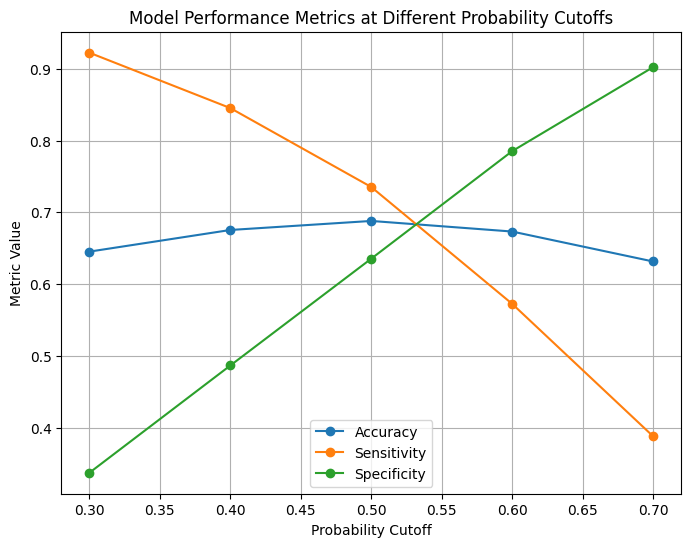

In [225]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(metrics_df['Cutoff'], metrics_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(metrics_df['Cutoff'], metrics_df['Sensitivity'], marker='o', label='Sensitivity')
plt.plot(metrics_df['Cutoff'], metrics_df['Specificity'], marker='o', label='Specificity')

plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics at Different Probability Cutoffs')
plt.legend()
plt.grid(True)
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [226]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Cutoff']
pred_df['Final_Prediction'] = (pred_df['predicted_prob'] > optimal_cutoff).astype(int)

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [227]:
# Calculate the accuracy
final_accuracy = metrics.accuracy_score(pred_df['actual_stayed'], pred_df['Final_Prediction'])
print(f"Final Accuracy at cutoff {optimal_cutoff:.2f}: {final_accuracy:.4f}")

Final Accuracy at cutoff 0.50: 0.6880


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [228]:
# Create the confusion matrix once again
final_conf_matrix = metrics.confusion_matrix(pred_df['actual_stayed'], pred_df['Final_Prediction'])
print(final_conf_matrix)

[[15717  9015]
 [ 7278 20217]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [229]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = final_conf_matrix.ravel()

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [230]:
# Calculate Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

Sensitivity: 0.7353


In [231]:
# Calculate Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.6355


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [232]:
# Calculate Precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")


Precision: 0.6916


In [233]:
# Calculate Recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")

Recall: 0.7353


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [234]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [235]:
# Check actual and predicted values from initial model
# actual values
actual = pred_df['actual_stayed']

# predicted probabilities from initial model
predicted_probs = pred_df['predicted_prob']

print(f"Actual values shape: {actual.shape}")
print(f"Predicted probabilities shape: {predicted_probs.shape}")

Actual values shape: (52227,)
Predicted probabilities shape: (52227,)


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

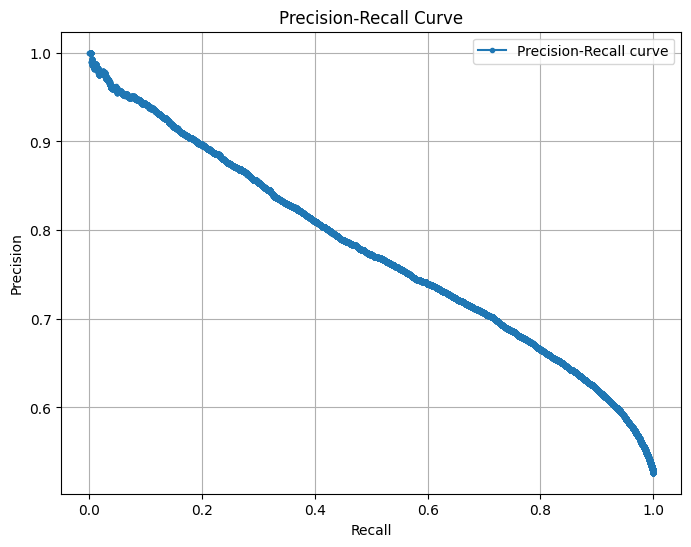

In [236]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(actual, predicted_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [237]:
# Select the relevant features for validation set
val_features = X_train_sm.columns.drop('const', errors='ignore')

X_test_selected = X_test[val_features]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [238]:
# Add constant to X_validation
# Drop constant column if present in training set features
val_features = X_train_sm.columns.drop('const', errors='ignore')

# Select these columns from your existing x_test
X_val_selected = X_test[val_features]

# Add constant column for statsmodels
X_val_selected_const = sm.add_constant(X_val_selected)

In [239]:
print(type(X_val_selected_const))
print(X_val_selected_const.shape)

<class 'pandas.core.frame.DataFrame'>
(22383, 16)


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [240]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
# Ensure x_test is a DataFrame and columns match training features (without constant)
val_features = X_train_sm.columns.drop('const', errors='ignore')

# Select features and add constant, forcing to DataFrame
X_val_selected = X_test[val_features].copy()
X_val_selected_const = sm.add_constant(X_val_selected)

print(X_val_selected_const.head())  # check format


       const  Years at Company  Number of Promotions  Distance from Home  \
61539    1.0              0.84                  0.00            0.531250   
42583    1.0              0.10                  0.00            0.302083   
55936    1.0              0.28                  0.00            0.552083   
66035    1.0              0.34                  0.50            0.416667   
23119    1.0              0.42                  0.25            0.500000   

       Number of Dependents  gender  Job Satisfaction_Low  \
61539              0.000000     1.0                   0.0   
42583              0.500000     0.0                   0.0   
55936              0.500000     1.0                   1.0   
66035              0.000000     0.0                   0.0   
23119              0.333333     1.0                   0.0   

       Job Satisfaction_Very High  Performance Rating_Below Average  \
61539                         0.0                               1.0   
42583                         0.0 

In [241]:
# 1.  the number of features selected by RFE
print("Number of features selected:", sum(rfe.support_))
print("Selected features:", list(selected_features))

# 2.  shape of X_val_selected
print("X_val_selected shape:", X_val_selected.shape)

# 3. Check if constant  exists
print("Columns before adding const:", X_val_selected.columns)

# 4. Add constant 
import statsmodels.api as sm
X_val_selected_const = sm.add_constant(X_val_selected, has_constant='add')

print("Columns after adding const:", X_val_selected_const.columns)
print("Shape after adding const:", X_val_selected_const.shape)

# 5. Check model params length
print("Length of model params:", len(result.params))


Number of features selected: 15
Selected features: ['Years at Company', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'gender', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']
X_val_selected shape: (22383, 15)
Columns before adding const: Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'gender', 'Job Satisfaction_Low',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD',
       'Marital Status_Single', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')
Columns after adding const: Index(['const', 'Years at Company', 'Number of Promotions',
       'Distance from Home

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [246]:
selected_features.count

<function list.count(value, /)>

In [248]:
X_val_selected = X_test[selected_features]
X_val_selected_const = sm.add_constant(X_val_selected)

In [249]:
y_validation_pred = result.predict(X_val_selected_const)
print(y_validation_pred.head())

61539    0.890738
42583    0.547761
55936    0.299514
66035    0.556483
23119    0.296895
dtype: float64


In [250]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['predicted_probability'])
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test.values, columns=['actual'])
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

In [252]:
# Step 4: Concatenate side by side
results_df = pd.concat([actual, predicted_probability], axis=1)

# Show first few rows
print(results_df.head())

   actual  predicted_probability
0    True               0.890738
1    True               0.547761
2   False               0.299514
3   False               0.556483
4   False               0.296895


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [253]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
# Define your optimal cutoff
optimal_cutoff = 0.5  # Change this to your actual cutoff if different

# final predictions using the cutoff
results_df['final_prediction'] = (results_df['predicted_probability'] >= optimal_cutoff).astype(int)

# Check the DataFrame
print(results_df.head())




   actual  predicted_probability  final_prediction
0    True               0.890738                 1
1    True               0.547761                 1
2   False               0.299514                 0
3   False               0.556483                 1
4   False               0.296895                 0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [255]:
# Calculate the overall accuracy
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(results_df['actual'], results_df['final_prediction'])

# Print accuracy
print(f"Overall Accuracy: {accuracy:.4f}")


Overall Accuracy: 0.6849


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [256]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# the confusion matrix
conf_matrix = confusion_matrix(results_df['actual'], results_df['final_prediction'])

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6739 3948]
 [3106 8590]]


In [257]:
# Create variables for true positive, true negative, false positive and false negative
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(results_df['actual'], results_df['final_prediction'])

# Unpack the matrix into individual components
tn, fp, fn, tp = conf_matrix.ravel()

# Print the values
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


True Negatives (TN): 6739
False Positives (FP): 3948
False Negatives (FN): 3106
True Positives (TP): 8590


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [259]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Sensitivity (Recall): 0.7344


In [260]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")


Specificity: 0.6306


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [262]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")


Precision: 0.6851


In [263]:
# Calculate recall
# Calculate Recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")

Recall: 0.7344


## Conclusion



In [309]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         Attrition_True   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.1618
Time:                        13:55:58   Log-Likelihood:                -30284.
converged:                       True   LL-Null:                       -36128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3012      0.033      9.126      0.000       0.236       0.366
Years at Company                     0.7163      0.044     16.260

The logistic regression model reveals several key factors influencing employee attrition. Higher years at the company and number of promotions significantly increase the likelihood of staying, while greater distance from home and being single strongly decrease retention. Gender, education level (PhD), and remote work status positively affect attrition odds, suggesting these groups are more likely to leave. Conversely, lower job satisfaction, poor performance ratings, and overtime reduce attrition risk, indicating these employees may be more likely to stay. Company reputation also plays a role, with fair and poor reputations associated with lower attrition. These insights can guide targeted retention strategies.